In [26]:
from IPython.display import Image, display
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
def detect_and_draw_box(filename, model="yolov3-tiny", confidence=0.6):
    """Detects common objects on an image and creates a new image with bounding boxes.
    Args:
        filename (str): Filename of the image.
        model (str): Either "yolov3" or "yolov3-tiny". Defaults to "yolov3-tiny".
        confidence (float, optional): Desired confidence level. Defaults to 0.6.
    """
    # Read the image into a numpy array
    img = cv2.imread(filename)
    # Perform the object detection
    bbox, label, conf = cv.detect_common_objects(img, confidence=confidence, model=model)
    # Print current image's filename
    print("Image processed")
    print(label)
    # Print detected objects with confidence level
    for l, c in zip(label, conf):
        print(f"Detected object: {l} with confidence level of {c}n")
    # Create a new image that includes the bounding boxes
    output_image = draw_bbox(img, bbox, label, conf)
    # Save the image in the directory images_with_boxes
    cv2.imwrite('image_with_boxes.png', output_image)
    # Display the image with bounding boxes
    display(Image('image_with_boxes.png'))

File exists!
Image processed
['apple']
Detected object: apple with confidence level of 0.6056398153305054n


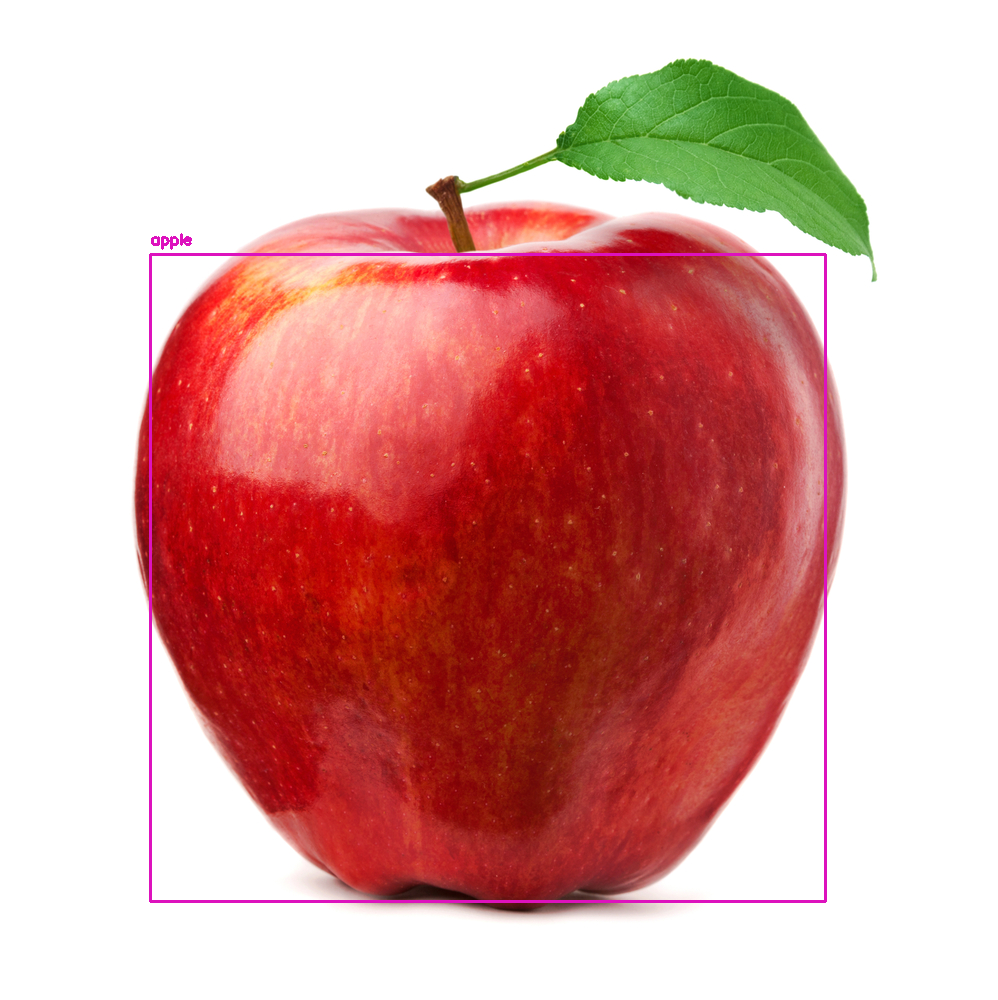

In [28]:
import os
filename = "/Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/apple.png"
if not os.path.exists(filename):
	print(f"File does not exist: {filename}")
else:
	print("File exists!")

detect_and_draw_box(filename)

In [1]:
import cv2
import numpy as np

# Load image, grayscale, Otsu's threshold 
image = cv2.imread('/Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/monster_wall.jpeg')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours, obtain bounding box, extract and save ROI
ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    # Check if the aspect ratio is greater than 9:16
    if h / w > 2:
        cv2.imwrite('/Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/ROI/ROI_{}.png'.format(ROI_number), ROI)
        print('saving ROI_{}.png'.format(ROI_number))
        ROI_number += 1

cv2.imshow('image', image)
cv2.waitKey(20000)
cv2.destroyAllWindows()

saving ROI_0.png
saving ROI_1.png
saving ROI_2.png
saving ROI_3.png
saving ROI_4.png
saving ROI_5.png
saving ROI_6.png
saving ROI_7.png
saving ROI_8.png
saving ROI_9.png
saving ROI_10.png
saving ROI_11.png
saving ROI_12.png
saving ROI_13.png
saving ROI_14.png
saving ROI_15.png
saving ROI_16.png
saving ROI_17.png
saving ROI_18.png
saving ROI_19.png
saving ROI_20.png
saving ROI_21.png
saving ROI_22.png
saving ROI_23.png
saving ROI_24.png
saving ROI_25.png
saving ROI_26.png
saving ROI_27.png
saving ROI_28.png
saving ROI_29.png
saving ROI_30.png
saving ROI_31.png
saving ROI_32.png
saving ROI_33.png
saving ROI_34.png
saving ROI_35.png
saving ROI_36.png
saving ROI_37.png
saving ROI_38.png
saving ROI_39.png
saving ROI_40.png
saving ROI_41.png
saving ROI_42.png
saving ROI_43.png
saving ROI_44.png
saving ROI_45.png
saving ROI_46.png
saving ROI_47.png
saving ROI_48.png
saving ROI_49.png
saving ROI_50.png


2024-12-10 16:14:30.270 python[52125:202135] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-10 16:14:30.270 python[52125:202135] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [4]:
img = cv2.imread('/Users/martinapanini/Library/Mobile Documents/com~apple~CloudDocs/Università/Signal_Image_Video/MonsterProject/MonsterRecognition/ROI/ROI_26.png')
img.shape

(525, 230, 3)